In [4]:
import pandas as pd
import matplotlib.pylab as plt
import string 
import pandas as pd
import matplotlib.pylab as plt
import string                            #导入字符串模块



# 数据预处理

In [6]:
tab1 = "./hair_dryer.tsv"
print(tab1)
tab2 = "."
df_hd = pd.read_csv(tab1, sep='\t', header=0)
df_hd.head()

./hair_dryer.tsv


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015


## 删除无效信息

In [7]:
df_hd = df_hd[~(df_hd['vine'].str.contains("N") & df_hd['verified_purchase'].str.contains("N"))]

In [8]:
df_hd = df_hd[(df_hd['total_votes'] > 0) & (df_hd['helpful_votes'] > 0)]

In [9]:
df_hd = df_hd.groupby('product_parent').filter(lambda x: len(x) > 1)

In [10]:
df_hd.describe(include="all")

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
count,2775,2.775000e+03,2775,2775,2.775000e+03,2775,2775,2775.000000,2775.000000,2775.000000,2775,2775,2775,2775,2775
unique,1,NaN,2775,173,NaN,143,1,NaN,NaN,NaN,2,2,2359,2770,1487
top,US,NaN,R2XXS3MQUCOCLZ,B00132ZG3U,NaN,conair 1875 watt tourmaline ceramic hair dryer,Beauty,NaN,NaN,NaN,N,Y,Five Stars,None available.,1/3/2015
freq,2775,NaN,1,152,NaN,152,2775,NaN,NaN,NaN,2691,2692,93,4,8
mean,NaN,2.978578e+07,NaN,NaN,4.940635e+08,NaN,NaN,3.840721,5.580180,6.407928,NaN,NaN,NaN,NaN,NaN
std,NaN,1.496295e+07,NaN,NaN,2.866049e+08,NaN,NaN,1.459326,22.852115,24.715966,NaN,NaN,NaN,NaN,NaN
min,NaN,3.219200e+04,NaN,NaN,4.239600e+05,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.604536e+07,NaN,NaN,2.351060e+08,NaN,NaN,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.949251e+07,NaN,NaN,4.867740e+08,NaN,NaN,5.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.386433e+07,NaN,NaN,7.346325e+08,NaN,NaN,5.000000,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN


## 按 product_parent 分组

In [11]:
gp_pp = df_hd.groupby('product_parent')

# # 选特定的一组
# print(gp_pp.get_group(732252283)['star_rating'])

# # 遍历
# for item in gp_pp:
#     print(item[0])
#     print(item[1]['star_rating'])

# gp_pp[['star_rating', 'helpful_votes', 'total_votes']].sum()

gp_pp[['star_rating', 'helpful_votes', 'total_votes']].sum().sort_values(by='helpful_votes',ascending=False)


,star_rating,helpful_votes,total_votes
product_parent,,,
758099411,597,1662,1943
47684938,454,877,923
732252283,332,625,677
127343313,194,534,579
694290590,284,483,508
...,...,...,...
168649310,22,10,11
791081896,12,8,12
54987170,21,6,6


In [73]:
df_pp = gp_pp.get_group(47684938)
df_pp_1 = df_pp[df_pp['star_rating'] == 1]
df_pp_2 = df_pp[df_pp['star_rating'] == 2]
df_pp_3 = df_pp[df_pp['star_rating'] == 3]
df_pp_4 = df_pp[df_pp['star_rating'] == 4]
df_pp_5 = df_pp[df_pp['star_rating'] == 5]

In [74]:
pattern = r"\&\#[0-9]+\;"

df_pp_5["preprocessed"] = df_pp_5["review_body"].str.replace(pat=pattern, repl="", regex=True)

print(df_pp_5["preprocessed"].iloc[2])

I bought this hair dryer after having it in my hotel room in Disney! I was using it and was really impressed with the speed at which is dried, the fullness of my hair and also the weight of the machine. Love the retractable cord. My hair is very fine and fly-away, especially in the humid weather. My style held even in the Florida heat. So, I came home and ordered one. Love it!


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

[nltk_data] Downloading package wordnet to /home/alphonse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alphonse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alphonse/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /home/alphonse/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [76]:
def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

In [77]:
#apply our functions
df_pp_5["preprocessed"] = df_pp_5["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(df_pp_5["preprocessed"].iloc[2])

I buy this hair dryer after have it in my hotel room in Disney I be use it and be really impressed with the speed at which be dry the fullness of my hair and also the weight of the machine Love the retractable cord My hair be very fine and fly-away especially in the humid weather My style hold even in the Florida heat So I come home and order one Love it


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df_pp_5["preprocessed"] = df_pp_5["preprocessed"].apply(remove_accent)

print(df_pp_5["preprocessed"].iloc[2])

I buy this hair dryer after have it in my hotel room in Disney I be use it and be really impressed with the speed at which be dry the fullness of my hair and also the weight of the machine Love the retractable cord My hair be very fine and fly-away especially in the humid weather My style hold even in the Florida heat So I come home and order one Love it


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [79]:
pattern = r"[^\w\s]"

df_pp_5["preprocessed"] = df_pp_5["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df_pp_5["preprocessed"].iloc[2])

I buy this hair dryer after have it in my hotel room in Disney I be use it and be really impressed with the speed at which be dry the fullness of my hair and also the weight of the machine Love the retractable cord My hair be very fine and fly away especially in the humid weather My style hold even in the Florida heat So I come home and order one Love it


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
df_pp_5["preprocessed"] = df_pp_5["preprocessed"].str.lower()

print(df_pp_5["preprocessed"].iloc[2])

i buy this hair dryer after have it in my hotel room in disney i be use it and be really impressed with the speed at which be dry the fullness of my hair and also the weight of the machine love the retractable cord my hair be very fine and fly away especially in the humid weather my style hold even in the florida heat so i come home and order one love it


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]
stop_words.append('br')

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df_pp_5["preprocessed"] = df_pp_5["preprocessed"].apply(remove_stop_words)
print(df_pp_5["preprocessed"].iloc[2])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

buy hair dryer hotel room disney use really impressed speed dry fullness hair also weight machine love retractable cord hair fine fly away especially humid weather style hold even florida heat come home order one love


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [82]:
pattern = r"[\s]+"

df_pp_5["preprocessed"] = df_pp_5["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df_pp_5["preprocessed"].iloc[2])

buy hair dryer hotel room disney use really impressed speed dry fullness hair also weight machine love retractable cord hair fine fly away especially humid weather style hold even florida heat come home order one love


/home/alphonse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
corpora = df_pp_5["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[2])

['buy', 'hair', 'dryer', 'hotel', 'room', 'disney', 'use', 'really', 'impressed', 'speed', 'dry', 'fullness', 'hair', 'also', 'weight', 'machine', 'love', 'retractable', 'cord', 'hair', 'fine', 'fly', 'away', 'especially', 'humid', 'weather', 'style', 'hold', 'even', 'florida', 'heat', 'come', 'home', 'order', 'one', 'love']


In [105]:
print(tokenized[2])
text = nltk.pos_tag(tokenized[2])
print(len(text))

['buy', 'hair', 'dryer', 'hotel', 'room', 'disney', 'use', 'really', 'impressed', 'speed', 'dry', 'fullness', 'hair', 'also', 'weight', 'machine', 'love', 'retractable', 'cord', 'hair', 'fine', 'fly', 'away', 'especially', 'humid', 'weather', 'style', 'hold', 'even', 'florida', 'heat', 'come', 'home', 'order', 'one', 'love']
36


In [106]:
hist_n = {} #创建一个空字典，放名词词频与单词，无序排列
hist_adj = {} #创建一个空字典，放形容词词频与单词，无序排列
data_n = [] #创建一个空列表，放词频与单词，有序：从多到少
data_adj = [] #创建一个空列表，放形容词词频与单词，有序：从多到少

noun = {'NN', 'NNS', 'NNP', 'NNPS'}
adj = {'JJ', 'JJR', 'JJS'}

In [107]:
i = 0
for review in tokenized:
    i = i + 1
    while '' in review:
        review.remove('')
    if len(review) < 1:
        continue
    text = nltk.pos_tag(review)
    if len(text) < 1:
        continue
    for word in text:
        if(word[1] in noun):
            if word[0] in hist_n:                          #统计词频与单词
                hist_n[word[0]] = hist_n[word[0]] + 1        #不是第一次
            else:
                hist_n[word[0]] = 1
        elif(word[1] in adj):
            if word[0] in hist_adj:                          #统计词频与单词
                hist_adj[word[0]] = hist_adj[word[0]] + 1        #不是第一次
            else:
                hist_adj[word[0]] = 1

In [108]:
excludes={"use","lot","way","love","month","job","thing","buy","review","day","get","product","year","not","if","setting","about","really","too","br","has","very", "so","on","at","when", "was","one","had", "it's","than","would","the","and","of","you","a","with","but","as","be","in","or","are", "i", "it", "to", "hair","this", "is", "my", "dryer", "for", "that", "have"}
for word in excludes:
    if word in hist_n:
        del(hist_n[word])

In [109]:
for key, value in hist_n.items():                    #遍历字典
    temp = [value,key]                              #变量，变量值
    data_n.append(temp)                               #添加数据
data_n.sort(reverse=True)                            #排序

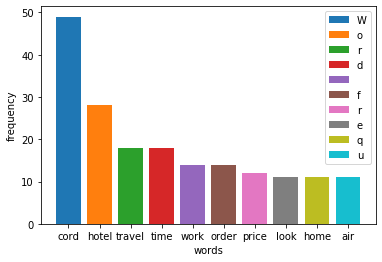

In [110]:
for i in range(0,10):
    plt.bar((data_n[i][1],),(data_n[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                               # 显示y轴名称
plt.legend('Word frequency histogram')                #显示图例
plt.show()  

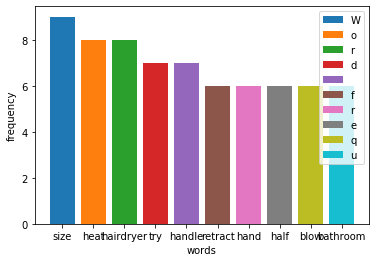

In [111]:
for i in range(10,20):
    plt.bar((data_n[i][1],),(data_n[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                                   # 显示y轴名称
plt.legend('Word frequency histogram')                             #显示图例
plt.show() 